### 1. FELADAT – Adatvizualizáció és felfedezés
- Cél: Az adathalmaz megtekintése, alapvető statisztikák és vizualizáció.
- sklearn.datasets.load_wine() dataset betöltése.
- pandas.DataFrame.describe(), info(), head() metódusokkal az adatok felfedezése.
- matplotlib és seaborn segítségével eloszlások, boxplotok és scatterplotok készítése.


          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


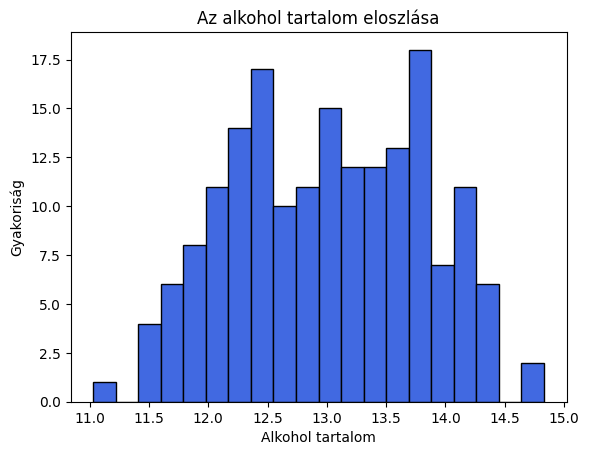

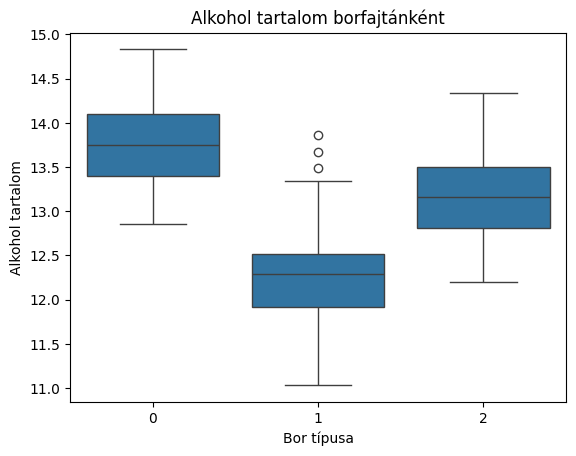

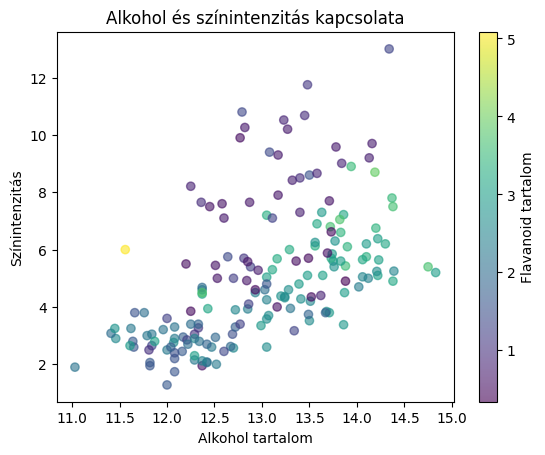

In [35]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target

print(df.describe())
print(df.info())
display(df.head())

plt.hist(df["alcohol"], bins=20, color="royalblue", edgecolor="black")
plt.xlabel("Alkohol tartalom")
plt.ylabel("Gyakoriság")
plt.title("Az alkohol tartalom eloszlása")

plt.show()

sns.boxplot(x="target", y="alcohol", data=df)
plt.xlabel("Bor típusa")
plt.ylabel("Alkohol tartalom")
plt.title("Alkohol tartalom borfajtánként")

plt.show()

scatter = plt.scatter(
                        df["alcohol"],
                        df["color_intensity"],
                        c=df['flavanoids'],
                        cmap='viridis',
                        alpha=0.6
                    )

plt.xlabel("Alkohol tartalom")
plt.ylabel("Színintenzitás")
plt.title("Alkohol és színintenzitás kapcsolata")


cbar = plt.colorbar(scatter)
cbar.set_label('Flavanoid tartalom')

plt.show()

### 2. FELADAT - Hasonlóság mérése a tabuláris adatok között
- Cél: Kiszámolni a hasonlóságot az adatsorok között különböző metrikákkal.
- Euklideszi távolság és Kozinusz hasonlóság (scipy.spatial.distance).
- KNN-alapú legközelebbi minta keresés (sklearn.neighbors.NearestNeighbors).


In [36]:
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cosine
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from numpy.linalg import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


A = df.iloc[0, :-1].values
B = df.iloc[50, :-1].values


euclidean_dist = euclidean(A, B)


cosine_sim = np.dot(A, B) / (norm(A) * norm(B))

print(euclidean_dist)
print(cosine_sim)



X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df["target"], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5, metric="cosine")
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Modell pontossága: {accuracy:.4f}")

print("\nOsztályozási riport:\n", classification_report(y_test, y_pred))

92.00919519265452
0.9992349213504652
KNN Modell pontossága: 0.9722

Osztályozási riport:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



### 3. FELADAT – Dimenziócsökkentés és vizualizáció
- Cél: Az adatok dimenzióját PCA és t-SNE segítségével csökkenteni és vizualizálni.
- PCA (Principal Component Analysis) -> főkomponens-analízis alkalmazása.
- t-SNE (t-Distributed Stochastic Neighbor Embedding) -> vizualizáció 2D-ben.

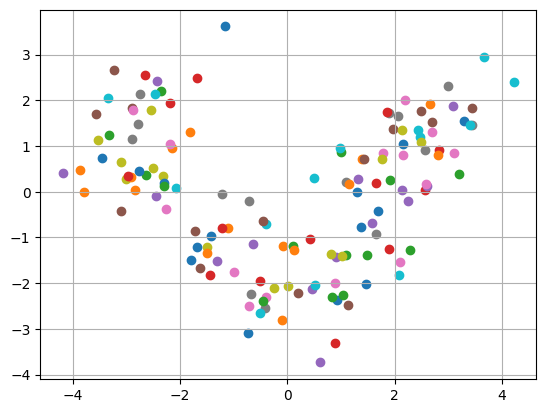

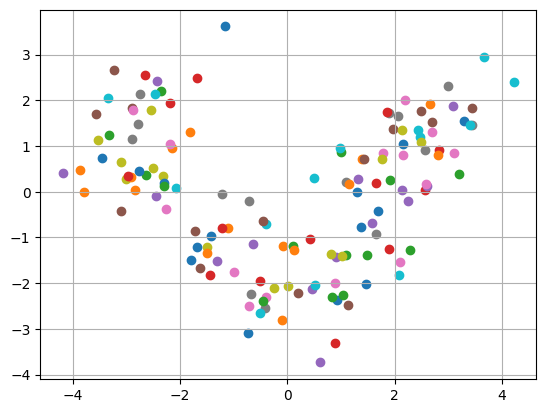

In [37]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

minta = df["alcohol"].head()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

for minta, coord in zip(X_train_scaled, X_pca):
  plt.scatter(coord[0], coord[1])


plt.grid()
plt.show()


tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)

for minta, coord in zip(X_train_scaled, X_pca):
  plt.scatter(coord[0], coord[1])

plt.grid()
plt.show()

### 4. FELADAT – KNN osztályozó a csökkentett dimenziós adatokon
- Cél: Megvizsgálni, hogyan változik egy KNN osztályozó teljesítménye a dimenziócsökkentés után.
- KNN osztályozó (KNeighborsClassifier).
- Összehasonlítani a teljesítményt eredeti vs. csökkentett dimenziós adatokon.


In [43]:
print("\nOsztályozási riport eredeti:\n", classification_report(y_test, y_pred))


X_train_csok = pca.fit_transform(X_train_scaled)
X_test_csok = pca.transform(X_test_scaled)

knn_csok = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn_csok.fit(X_train_csok, y_train)

y_pred_csok = knn_csok.predict(X_test_csok)

acc_csok = accuracy_score(y_test, y_pred_csok)

print("\nOsztályozási riport csökkentett:\n", classification_report(y_test, y_pred_csok))



ossze = pd.DataFrame({
    "Adatkészlet": ["Eredeti", "Csökkentett"],
    "Pontosság": [accuracy, acc_csok]
})
display(ossze)


Osztályozási riport eredeti:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36


Osztályozási riport csökkentett:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



,Adatkészlet,Pontosság
0,Eredeti,0.972222
1,Csökkentett,1.000000
